In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Dataset sources
Food waste - https://stats.oecd.org/viewhtml.aspx?datasetcode=FOOD_WASTE&lang=en

Country data - https://www.kaggle.com/datasets/yusufglcan/country-data

 **Dataset 1 - Food waste**

In [3]:
food_waste = pd.read_csv("C:/Users/Uche Buzz/Desktop/SAS Curiosity Cup/Datasets/FOOD_WASTE_csvformat.csv")
food_waste.head(3)

,LOCATION,Country,CAT,Category,ACT,Activity,UNIT,Unit,VAR,Variable,SRC,Source,TIME,Time,Value,Flag Codes,Flags
0,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,TONNES,tonnes,FWVAR511,Unnecessary edible food waste (e.),SOURCE22,CONCITO,2011,2011,110000.000,NaN,NaN
1,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,TONNES,tonnes,FWVAR308DNK,Food Waste - Non-edible,SOURCE22,CONCITO,2011,2011,541000.000,NaN,NaN
2,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,KGBYCAPITA,kg/capita,FWVAR511,Unnecessary edible food waste (e.),SOURCE22,CONCITO,2011,2011,19.746,NaN,NaN


In [4]:
# Data shape

food_waste.shape

(3079, 17)

In [5]:
# Check the datatypes and structure

food_waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079 entries, 0 to 3078
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    3079 non-null   object 
 1   Country     3079 non-null   object 
 2   CAT         3079 non-null   object 
 3   Category    3079 non-null   object 
 4   ACT         3079 non-null   object 
 5   Activity    3079 non-null   object 
 6   UNIT        3079 non-null   object 
 7   Unit        3079 non-null   object 
 8   VAR         3079 non-null   object 
 9   Variable    3079 non-null   object 
 10  SRC         3079 non-null   object 
 11  Source      3079 non-null   object 
 12  TIME        3079 non-null   int64  
 13  Time        3079 non-null   int64  
 14  Value       3079 non-null   float64
 15  Flag Codes  0 non-null      float64
 16  Flags       0 non-null      float64
dtypes: float64(3), int64(2), object(12)
memory usage: 409.1+ KB


In [6]:
# How many years are in present in the data

food_waste['TIME'].nunique()

21

In [7]:
# Unique years in the data

set(food_waste['TIME'])

{1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013}

In [8]:
# Drop flag codes and flags columns since they are null

# food_waste.dropna(subset=['Flag Codes', 'Flags'], inplace=True)

 **Dataset 2 - Country GDP**

In [9]:
countries = pd.read_csv("C:/Users/Uche Buzz/Desktop/SAS Curiosity Cup/Datasets/Countries.csv")
countries.head(3)

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553


In [10]:
# Date shape

countries.shape

(5106, 25)

In [11]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   5106 non-null   object 
 1   Country Code                   5106 non-null   object 
 2   Year                           5106 non-null   int64  
 3   Agriculture (% GDP)            4830 non-null   float64
 4   Ease of Doing Business         4508 non-null   float64
 5   Education Expenditure (% GDP)  4738 non-null   float64
 6   Export (% GDP)                 4646 non-null   float64
 7   GDP                            5037 non-null   float64
 8   Health Expenditure (% GDP)     4531 non-null   float64
 9   Import (% GDP)                 4646 non-null   float64
 10  Industry (% GDP)               4853 non-null   float64
 11  Inflation Rate                 4554 non-null   float64
 12  R&D                            3588 non-null   f

In [12]:
# Number of missing values for each column

countries.isna().sum()

Country Name                        0
Country Code                        0
Year                                0
Agriculture (% GDP)               276
Ease of Doing Business            598
Education Expenditure (% GDP)     368
Export (% GDP)                    460
GDP                                69
Health Expenditure (% GDP)        575
Import (% GDP)                    460
Industry (% GDP)                  253
Inflation Rate                    552
R&D                              1518
Service (% GDP)                   299
Unemployment                      667
Population                          0
Land                                0
Continent Name                      0
Export                            460
Import                            460
Education Expenditure             414
Health Expenditure                575
Net Trade                         460
GDP Per Capita                     69
Population Density                  0
dtype: int64

The above shows the dataset contains a lot of missing data spanning across years. However, the missing rows will not be dropped as it will make the analysis skewed.

In [13]:
# Get a list of years both dataset have in common

a = list(set(countries['Year']))

b = list(set(food_waste['TIME']))

years = [i for i in a if i in b]
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

# WASTE AND ECONOMIC WELLBEING OF COUNTRIES

Questions to answer




1. What is the most prominent category of waste
2. Time series trend
3. Which Country has the most waste
4. 5 year gap and predictable analysis of the plot.
5. Time series of agricultural waste generated by Countries
6. Time series of Household waste generated by countries
7. What is the GDP of the countries with highest waste generated?
8. What countries have the highest Health Expenditure? Are these countries part of the countries with the highest waste production globally?

In [14]:
# What is the most predominate waste


food_waste['ACT'].value_counts()

ACT
HOUSEHOLDS                       944
COMBINEDEUROSTATPROXYFORMANUF    366
AGRICULTURALPRODUCTION           338
COMBINEDEUROSTATPROXYFORSERVI    292
COMBINEDPOST-PRODUCTIONANDPRE    272
TOTAL                            229
WHOLESALEANDRETAIL               133
RETAIL                           119
COMBINEDPRERETAIL                 84
FOODINDUSTRY                      43
RESTAURANTS                       33
COMBINEDHOUSEHOLDSANDFOODSERV     32
COMBINEDRETAILPLUSFOODSERVICE     30
FOODSERVICES                      28
CONTEXTUALDATA                    21
COMBINEDFOODSERVICETOHOUSEHOL     21
MUNICIPALWASTE                    18
WHOLESALE                         15
SCHOOLCANTINES                    13
COMBINEDPOST-PRODUCTION           11
COMBINEDPRE-CONSUMPTION            7
COMBINEDRETAILANDFOODSERVICES      5
COMBINEDRETAILTOHOUSEHOLDS         3
GROCERYSTORES                      3
PRODUCERS                          3
MANUFACTURINGOFFOODPRODUCTS        2
TRADE                             

In [15]:
predominant_waste = food_waste.groupby(['ACT'], as_index=False)['Value'].sum().sort_values(by='Value', ascending=False)

predominant_waste = predominant_waste[predominant_waste['ACT'] != 'TOTAL']

C:\Users\Uche Buzz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


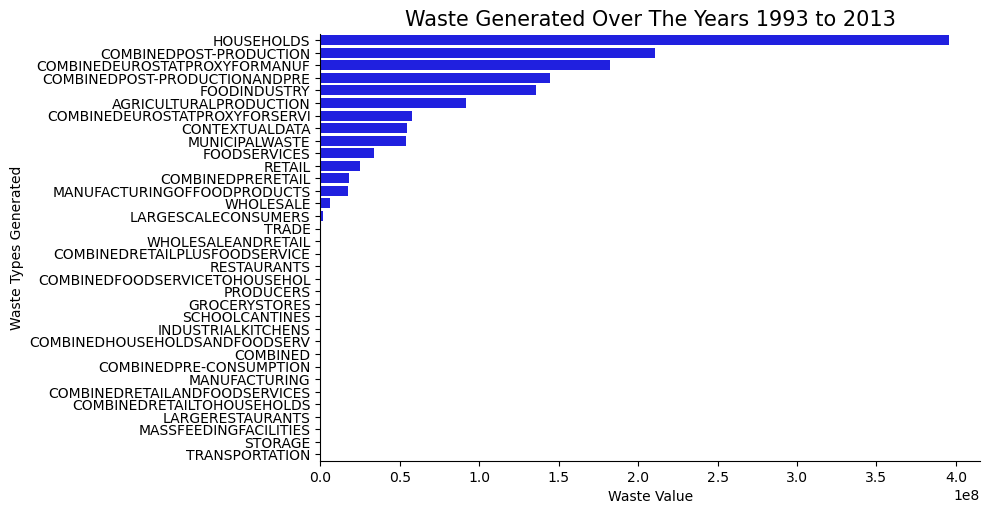

In [16]:
# Plot to see the waste over the years

sns.catplot( x= 'Value', y='ACT',data= predominant_waste, kind='bar', color='Blue', errorbar=None, height=5, aspect=2)
plt.title("Waste Generated Over The Years 1993 to 2013", size = 15)
plt.xlabel("Waste Value")
plt.ylabel("Waste Types Generated")
plt.show()

The plot shows household waste is the most generated waste over the years, followed by post production waste.

**Question 2:**
Which country generated the most household waste.

In [17]:
# Filter by household waste and group by country

household_waste = food_waste[food_waste['ACT'] == 'HOUSEHOLDS']

household_waste = household_waste.groupby(['Country'], as_index=False)['Value'].sum().sort_values(by='Value', ascending=False)

C:\Users\Uche Buzz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


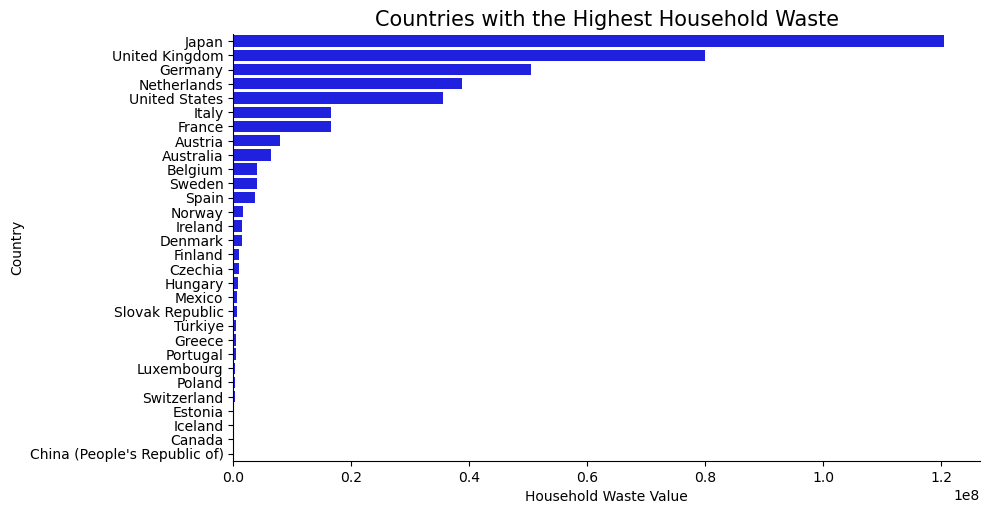

In [18]:
# Plot to see the waste over the years

sns.catplot( x= 'Value', y='Country',data= household_waste, kind='bar', color='Blue', errorbar=None, height=5, aspect=2)
plt.title("Countries with the Highest Household Waste", size = 15)
plt.xlabel("Household Waste Value")
plt.ylabel("Country")
plt.show()

**Question 3:**
Which country generated the most production waste.

In [19]:
# Filter by household waste and group by country

postproduction_waste = food_waste[food_waste['ACT'] == 'COMBINEDPOST-PRODUCTION']

postproduction_waste = postproduction_waste.groupby(['Country'], as_index=False)['Value'].sum().sort_values(by='Value', ascending=False)

C:\Users\Uche Buzz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


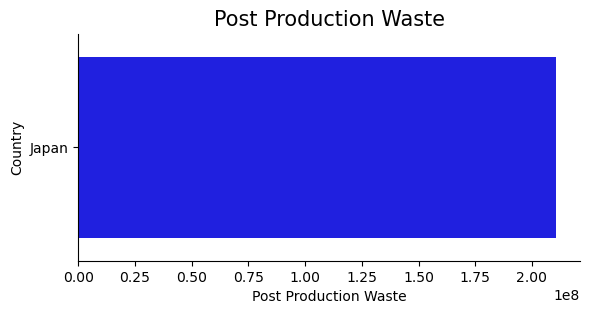

In [20]:
# Plot to see the waste over the years

sns.catplot( x= 'Value', y='Country',data= postproduction_waste, kind='bar', color='Blue', errorbar=None, height=3, aspect=2)
plt.title("Post Production Waste", size = 15)
plt.xlabel("Post Production Waste")
plt.ylabel("Country")
plt.show()

**Question 4:** Time series of waste generation

In [21]:
# Filter Top 6 waste generated

top_waste = list(predominant_waste.iloc[:6, 0])

food_waste_series = food_waste[food_waste['ACT'].isin(top_waste)]

# Filter for years from 2000 to 2013

food_waste_series_y = food_waste_series[food_waste_series['TIME'].isin(years)]

food_waste_series_y.shape

(1958, 17)

In [22]:
food_waste.columns

Index(['LOCATION', 'Country', 'CAT', 'Category', 'ACT', 'Activity', 'UNIT',
       'Unit', 'VAR', 'Variable', 'SRC', 'Source', 'TIME', 'Time', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

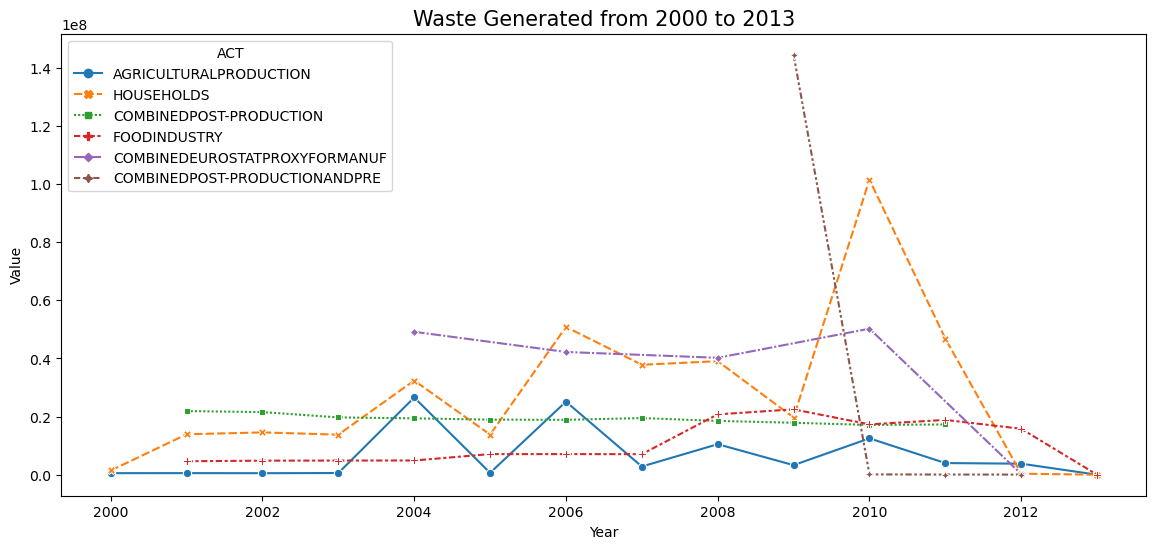

In [23]:
data = food_waste_series_y.groupby(['TIME', 'ACT'], as_index=False)['Value'].sum()

# Create line plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='TIME', y='Value', hue='ACT', data=data, markers=True, style='ACT')
plt.title("Waste Generated from 2000 to 2013", size = 15)
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()

Question 5: Time series of agricultural waste generated by Countries

In [24]:
# Filter for top countries
top_waste_countries = list(household_waste.iloc[:5, 0])


agr_waste_country = food_waste[food_waste['Country'].isin(top_waste_countries)]

# Filter for AGRICULTURALPRODUCTION waste only
agr_waste_country = agr_waste_country[agr_waste_country['ACT'] == 'AGRICULTURALPRODUCTION']

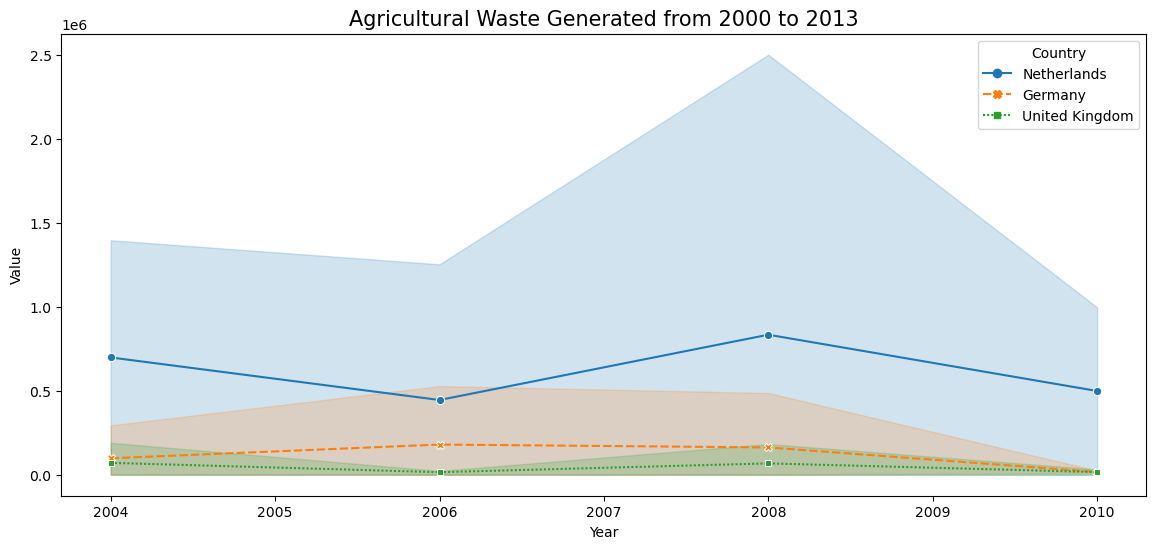

In [25]:
# Plot Top Countries Agricultaural waste generated

# Create line plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='TIME', y='Value', hue='Country', data=agr_waste_country, markers=True, style='Country')
plt.title("Agricultural Waste Generated from 2000 to 2013", size = 15)
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()

Question 6: Time series of Household waste generatered by countries

In [26]:
# Filter top waste countries
household_waste_countries = food_waste[food_waste['Country'].isin(top_waste_countries)]


# Filter for household waste only
household_waste_countries = household_waste_countries[household_waste_countries['ACT']=='HOUSEHOLDS']

# Ensure date only in years we want
household_waste_countries = household_waste_countries[household_waste_countries['TIME'].isin(years)]

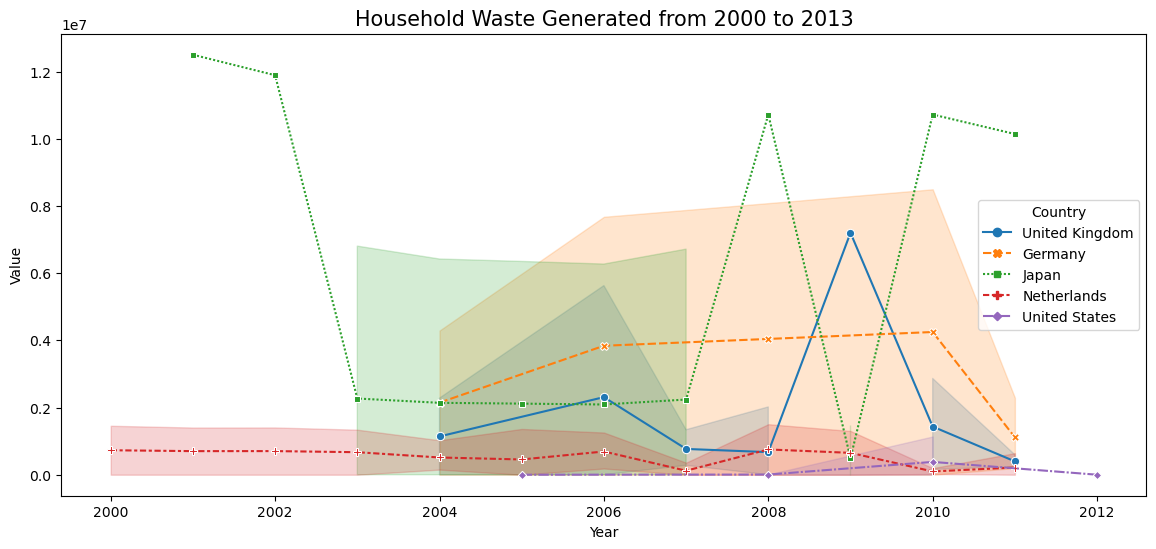

In [27]:
# Plot countries by the household waste generated.

# Plot Top Countries Agricultaural waste generated

# Create line plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='TIME', y='Value', hue='Country', data=household_waste_countries,  markers=True, style='Country')
plt.title("Household Waste Generated from 2000 to 2013", size = 15)
plt.xlabel("Year")
plt.ylabel("Value")

plt.show()

#####  Join Dataset

In [28]:
# Join dataset together using country code
data = food_waste.merge(countries, how = 'inner', right_on=['Country Code', 'Year'], left_on=['LOCATION', 'TIME'])


# Data shape
data.shape

(3057, 42)

In [29]:
data.head(2)

,LOCATION,Country,CAT,Category,ACT,Activity,UNIT,Unit,VAR,Variable,...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,TONNES,tonnes,FWVAR511,Unnecessary edible food waste (e.),...,5570572.0,42920.0,Europe,1.851430e+11,1.631457e+11,5.172520e+10,3.580051e+10,2.199729e+10,61753.647132,129.789655
1,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,TONNES,tonnes,FWVAR308DNK,Food Waste - Non-edible,...,5570572.0,42920.0,Europe,1.851430e+11,1.631457e+11,5.172520e+10,3.580051e+10,2.199729e+10,61753.647132,129.789655


**Question 7:** What is the GDP of the countries with highest waste generated?

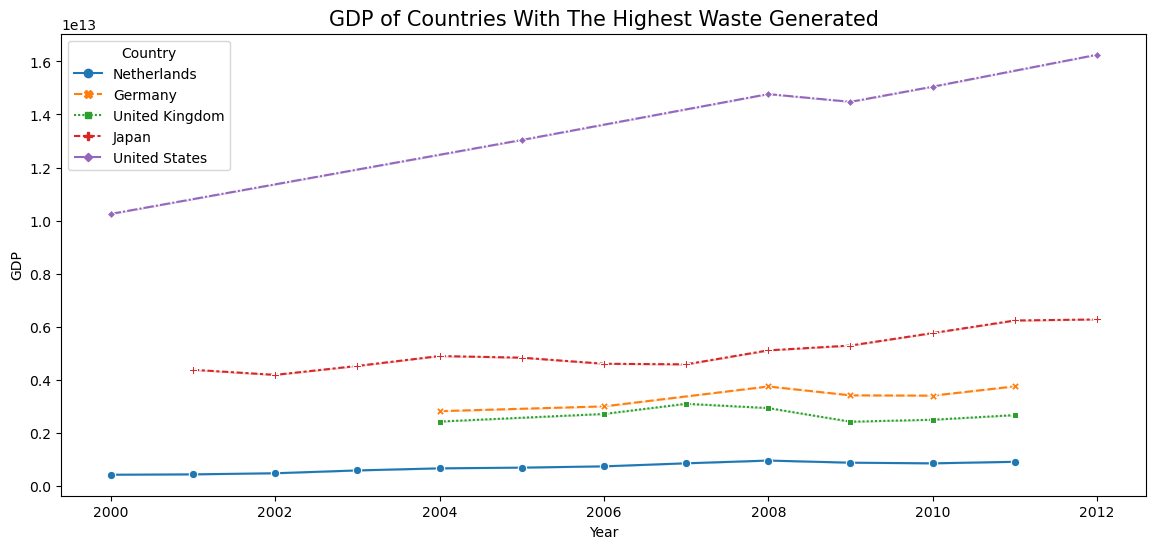

In [30]:
# Filter for countries with highest waste
gdp_top_waste_countries = data[data['Country'].isin(top_waste_countries)]


# Create line plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='TIME', y='GDP', hue='Country', data=gdp_top_waste_countries,  markers=True, style='Country')
plt.title("GDP of Countries With The Highest Waste Generated", size = 15)
plt.xlabel("Year")
plt.ylabel("GDP")

plt.show()

In [31]:
#By Population

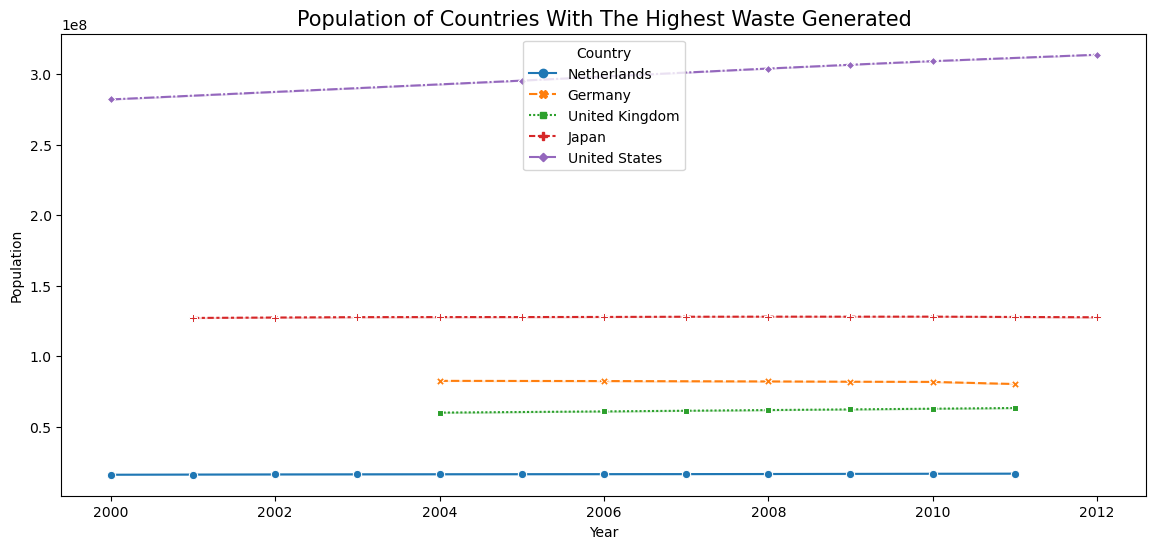

In [32]:
# Create line plot 
plt.figure(figsize=(14, 6))
sns.lineplot(x='TIME', y='Population', hue='Country', data=gdp_top_waste_countries,  markers=True, style='Country')
plt.title("Population of Countries With The Highest Waste Generated", size = 15)
plt.xlabel("Year")
plt.ylabel("Population")

plt.show()




pop_waste = data.loc[:,['Country', 'Population', 'Value', 'Year']] 
uk_pop_waste = pop_waste[pop_waste['Country']=='United Kingdom']


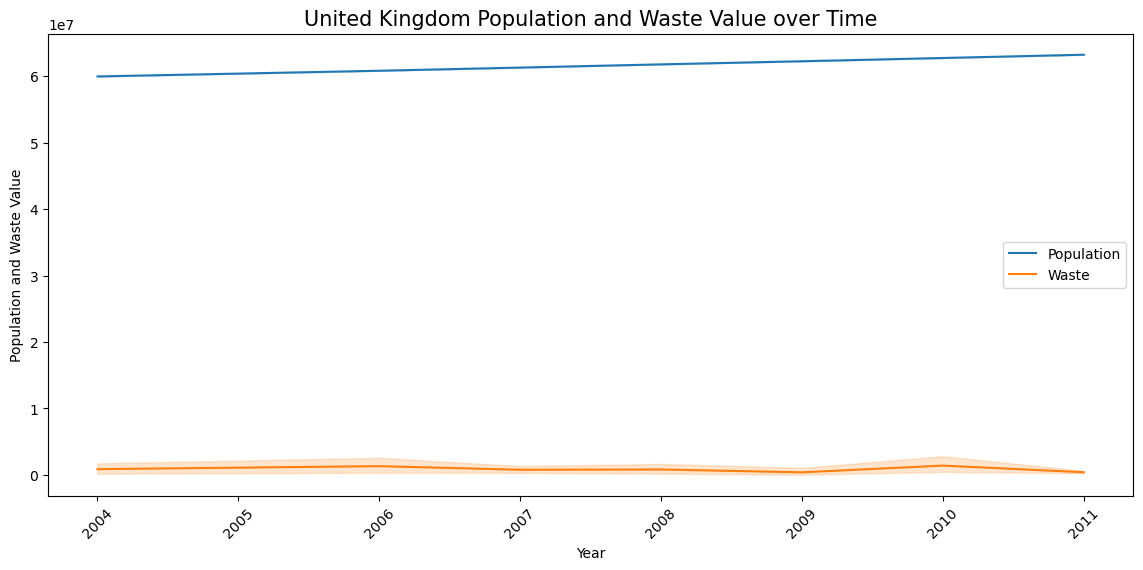

In [33]:
# Create the scatter plot 
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Population', data=uk_pop_waste, label='Population')
sns.lineplot(x='Year', y='Value', data=uk_pop_waste, label='Waste')
plt.xlabel('Year')
plt.ylabel('Population and Waste Value')
plt.title('United Kingdom Population and Waste Value over Time', size = 15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


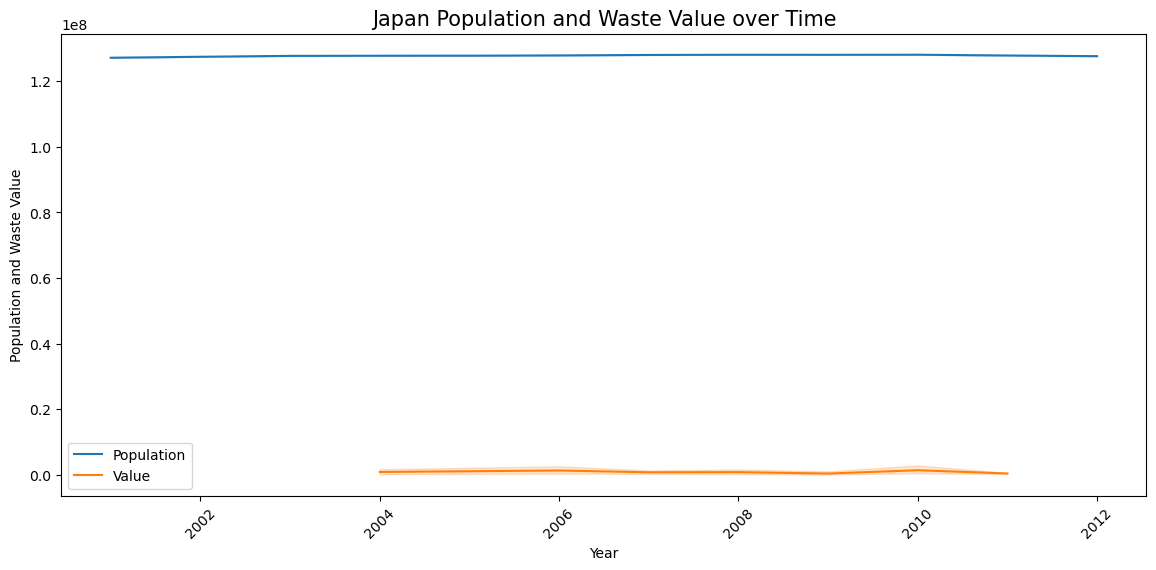

In [34]:
# Japan
jp_pop_waste = pop_waste[pop_waste['Country']=='Japan']

# Create the scatter plot 
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Population', data=jp_pop_waste, label='Population')
sns.lineplot(x='Year', y='Value', data=uk_pop_waste, label='Value')
plt.xlabel('Year')
plt.ylabel('Population and Waste Value')
plt.title('Japan Population and Waste Value over Time', size = 15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



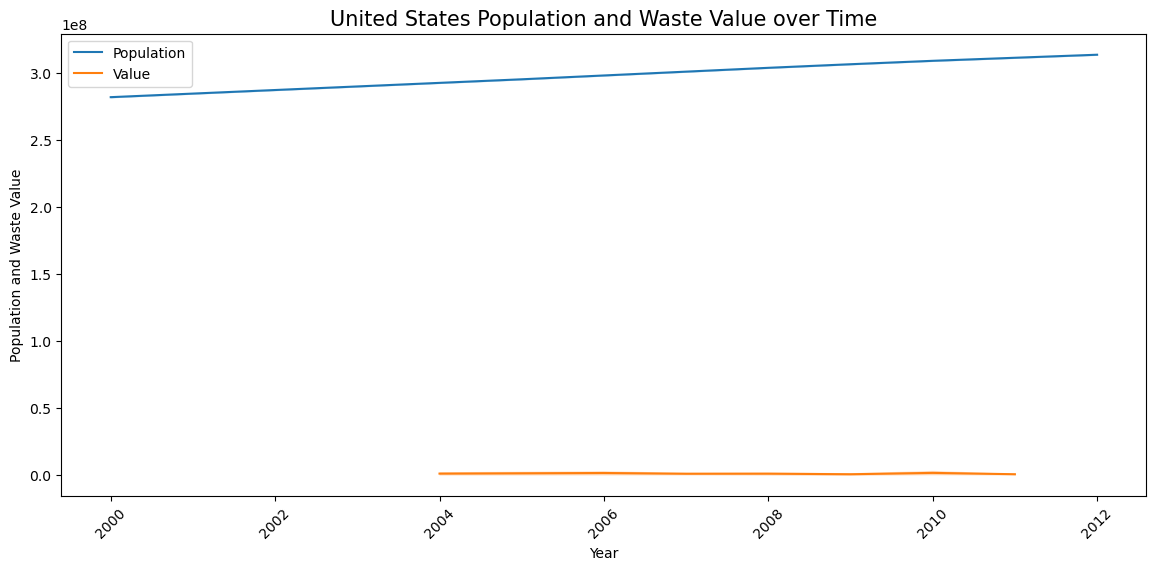

In [35]:
# United States
usa_pop_waste = pop_waste[pop_waste['Country']=='United States']

# Create the scatter plot 
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Population', data=usa_pop_waste, label='Population')
sns.lineplot(x='Year', y='Value', data=uk_pop_waste, label='Value')
plt.xlabel('Year')
plt.ylabel('Population and Waste Value')
plt.title('United States Population and Waste Value over Time', size = 15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()